In [ ]:
'''
# validation_strel.py

import torch
import numpy as np
import matplotlib.pyplot as plt

# Import STL/STREL logic nodes
from torcheck.stl import (
    Atom, Not, And, Or, Eventually, Globally, Until, Since,
    Reach, Escape
)

# =======================
# Signal generation
# =======================
T = 50     # number of time steps
N = 5      # number of nodes
B = 1      # batch size

t = torch.linspace(0, 1.5 * np.pi, T)  # time points
signal_1d = -torch.sin(t)              # shape: (T,)
signal_tensor = signal_1d.repeat(B, N, 1)  # (B, N, T)

# =======================
# Distance matrix
# =======================
D = torch.tensor([
    [0., 1., 2., 3., 4.],
    [1., 0., 1., 2., 3.],
    [2., 1., 0., 1., 2.],
    [3., 2., 1., 0., 1.],
    [4., 3., 2., 1., 0.]
])

# =======================
# Define STL/STREL formulas
# =======================
phi = Atom(var_index=0, threshold=-0.5, lte=False)  # x >= -0.5
not_phi = Not(phi)
phi_and_phi = And(phi, phi)
phi_or_not_phi = Or(phi, not_phi)

glob_phi = Globally(phi, left_time_bound=0, right_time_bound=10)
ev_phi = Eventually(phi, left_time_bound=0, right_time_bound=10)
until_formula = Until(phi, not_phi, left_time_bound=0, right_time_bound=10)

reach = Reach(phi1=phi, phi2=phi, distance_matrix=D, d_min=1.0, d_max=2.0)
escape = Escape(phi=phi, distance_matrix=D, d_min=1.0, d_max=2.0)

# =======================
# Boolean evaluation at t = 0
# =======================
print("=== Boolean Semantics @ t = 0 ===")
print("Atom:      ", phi.boolean(signal_tensor).item())
print("Not:       ", not_phi.boolean(signal_tensor).item())
print("And:       ", phi_and_phi.boolean(signal_tensor).item())
print("Or:        ", phi_or_not_phi.boolean(signal_tensor).item())
print("Globally:  ", glob_phi.boolean(signal_tensor).item())
print("Eventually:", ev_phi.boolean(signal_tensor).item())
print("Until:     ", until_formula.boolean(signal_tensor).item())
# print("Reach:     ", reach.boolean(signal_tensor).item())
# Print reach results at time t=0 for all nodes
reach_result = reach.boolean(signal_tensor)  # shape: (B, 1, T, N)
print("Reach @ t=0:", reach_result[0, 0, 0, :].tolist())  # ✅ list of True/False per node
# print("Escape:    ", escape.boolean(signal_tensor).item())
escape_result = escape.boolean(signal_tensor)
print("Escape @ t=0:", escape_result[0, 0, 0, :].tolist())

# =======================
# Quantitative evaluation at t = 0
# =======================
print("\n=== Quantitative Semantics @ t = 0 ===")
print("Atom:      ", phi.quantitative(signal_tensor).item())
print("Not:       ", not_phi.quantitative(signal_tensor).item())
print("And:       ", phi_and_phi.quantitative(signal_tensor).item())
print("Or:        ", phi_or_not_phi.quantitative(signal_tensor).item())
print("Globally:  ", glob_phi.quantitative(signal_tensor).item())
print("Eventually:", ev_phi.quantitative(signal_tensor).item())
print("Until:     ", until_formula.quantitative(signal_tensor).item())
print("Reach:     ", reach.quantitative(signal_tensor).item())
print("Escape:    ", escape.quantitative(signal_tensor).item())

# =======================
# Temporal satisfaction (Reach & Escape)
# =======================
reach_bool = reach.boolean(signal_tensor, evaluate_at_all_times=True)[0, 0]   # (T, N)
escape_bool = escape.boolean(signal_tensor, evaluate_at_all_times=True)[0, 0] # (T, N)

# =======================
# Plot: Signal
# =======================
plt.figure(figsize=(10, 4))
for i in range(N):
    plt.plot(t.numpy(), signal_tensor[0, i].numpy(), label=f"Node {i}")
plt.title("Negative Sine Signal across Nodes")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =======================
# Plot: Reach Boolean Satisfaction Over Time
# =======================
plt.figure(figsize=(10, 4))
for i in range(N):
    plt.plot(t.numpy(), reach_bool[:, i].float().numpy(), label=f"Reach@Node {i}")
plt.title("Reach Satisfaction Over Time (Boolean)")
plt.xlabel("Time")
plt.ylabel("Satisfied (1) or Not (0)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =======================
# Plot: Escape Boolean Satisfaction Over Time
# =======================
plt.figure(figsize=(10, 4))
for i in range(N):
    plt.plot(t.numpy(), escape_bool[:, i].float().numpy(), label=f"Escape@Node {i}")
plt.title("Escape Satisfaction Over Time (Boolean)")
plt.xlabel("Time")
plt.ylabel("Satisfied (1) or Not (0)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
'''

=== Boolean Semantics @ t = 0 ===
Atom:       True
Not:        False
And:        True
Or:         True
Globally:   False
Eventually: True
Until:      False


IndexError: too many indices for tensor of dimension 1

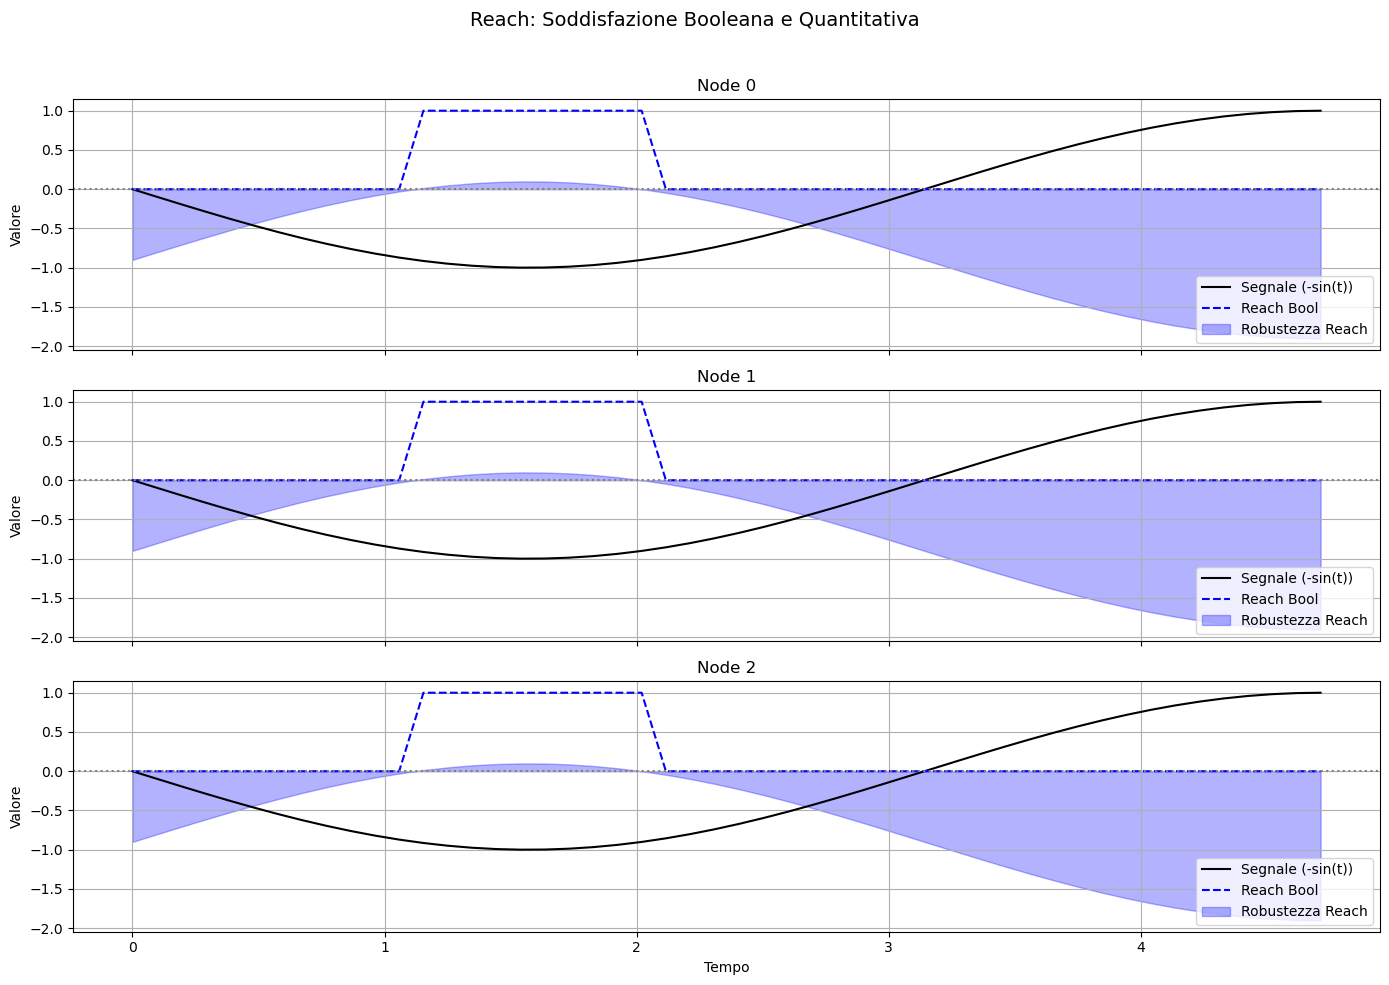

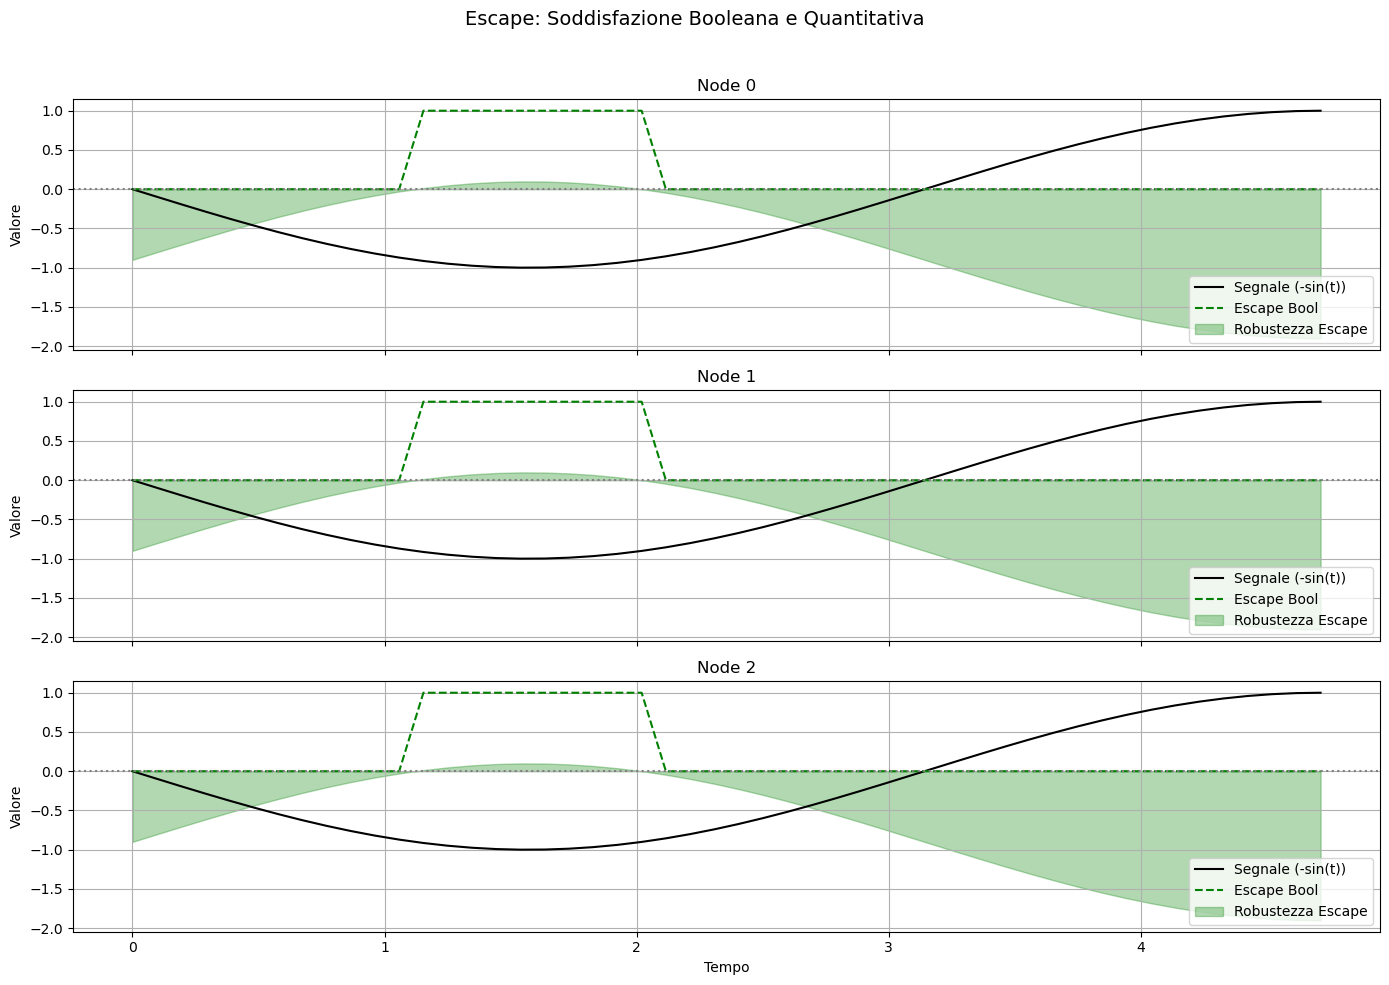

In [ ]:
'''
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import pi

from torcheck.stl import Atom, Reach, Escape 

# ----------------------------
# Genera il segnale -sin(t)
# ----------------------------

T = 50
time = torch.linspace(0, 3 * pi / 2, T)
signal_1d = -torch.sin(time)  # segnale

# Espandi il segnale su 3 nodi → shape: [1, 3, T]
x = signal_1d.repeat(3, 1).unsqueeze(0)

# ----------------------------
# Matrice delle distanze
# ----------------------------

D = torch.tensor([
    [0.0, 1.0, 2.0],
    [1.0, 0.0, 1.0],
    [2.0, 1.0, 0.0]
])

# ----------------------------
# Definizione formule atomiche e operatori
# ----------------------------

phi1 = Atom(var_index=0, threshold=-0.5, lte=True)
phi2 = Atom(var_index=0, threshold=-0.9, lte=True)

reach = Reach(phi1, phi2, D, d_min=1.0, d_max=2.0)
escape = Escape(phi2, D, d_min=1.0, d_max=2.0)

# ----------------------------
# Valutazione
# ----------------------------

bool_reach = reach.boolean(x, evaluate_at_all_times=True).squeeze(1)
quant_reach = reach.quantitative(x, evaluate_at_all_times=True).squeeze(1)

bool_escape = escape.boolean(x, evaluate_at_all_times=True).squeeze(1)
quant_escape = escape.quantitative(x, evaluate_at_all_times=True).squeeze(1)

# ----------------------------
# PLOT: Reach (solo)
# ----------------------------

fig_reach, axes_reach = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
for node in range(3):
    ax = axes_reach[node]
    ax.plot(time.numpy(), x[0, node, :].numpy(), label="Segnale (-sin(t))", color='black')
    ax.plot(time.numpy(), bool_reach[0, :, node].numpy(), '--', label="Reach Bool", color='blue')
    ax.fill_between(time.numpy(), 0, quant_reach[0, :, node].numpy(),
                    alpha=0.3, color='blue', label="Robustezza Reach")
    ax.set_title(f"Node {node}")
    ax.set_ylabel("Valore")
    ax.axhline(0, color='gray', linestyle=':')
    ax.grid(True)
    ax.legend(loc="lower right")

axes_reach[-1].set_xlabel("Tempo")
fig_reach.suptitle("Reach: Soddisfazione Booleana e Quantitativa", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# ----------------------------
# PLOT: Escape (solo)
# ----------------------------

fig_escape, axes_escape = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
for node in range(3):
    ax = axes_escape[node]
    ax.plot(time.numpy(), x[0, node, :].numpy(), label="Segnale (-sin(t))", color='black')
    ax.plot(time.numpy(), bool_escape[0, :, node].numpy(), '--', label="Escape Bool", color='green')
    ax.fill_between(time.numpy(), 0, quant_escape[0, :, node].numpy(),
                    alpha=0.3, color='green', label="Robustezza Escape")
    ax.set_title(f"Node {node}")
    ax.set_ylabel("Valore")
    ax.axhline(0, color='gray', linestyle=':')
    ax.grid(True)
    ax.legend(loc="lower right")

axes_escape[-1].set_xlabel("Tempo")
fig_escape.suptitle("Escape: Soddisfazione Booleana e Quantitativa", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()
'''

# Reach

### Interpretazione generale
L'operatore Reach verifica se esiste un nodo raggiungibile (entro distanza $[1.0, 2.0]$) in cui $\phi_2$ (cioè $-sin(t) \leq -0.9$) è soddisfatto, passando attraverso nodi che soddisfano $\phi_1$ ($-sin(t) \leq -0.5$).

### Analisi
Intorno a $t ≈ 1.2$ a $t≈2.1$, il segnale scende al di sotto di $-0.9 \rightarrow \phi_2$ è vero su alcuni nodi.
In questo intervallo:
- Soddisfazione booleana diventa True su tutti e 3 i nodi.
- Robustezza è positiva (area blu): maggiore robustezza indica maggiore “distanza di sicurezza” dalla soglia $-0.9$.
Dopo $t>2.2$: il segnale risale $\rightarrow \phi_2$ non è più soddisfatto $\rightarrow$ Reach fallisce.

*Significato*: Tutti i nodi riescono a “raggiungere” un nodo che soddisfa $\phi_2$ solamente durante l’intervallo dove il segnale è sufficientemente negativo in almeno un nodo vicino.

# Escape

### Interpretazione generale
L’operatore Escape verifica se da un nodo è possibile “fuggire” verso un nodo in cui $\phi_2$ è vero ($-sin(t) \leq -0.9$), entro distanza $[1.0,2.0]$. Non richiede che $\phi_1$ sia vero lungo il cammino.

### Analisi
Stesso intervallo attivo di Reach (circa da $t=1.2$ a $t=2.1$). Tuttavia: Escape è leggermente più permissivo: non richiede condizioni su nodi intermedi.

Il comportamento booleano è identico al Reach nei plot, perché i nodi sono piccoli e ben connessi.
La robustezza (area verde) è simile ma leggermente più ampia in certe zone — coerente con la semantica più “flessibile”.
*Significato*: Escape permette la soddisfazione più facilmente: anche se il nodo stesso non soddisfa $\phi_2$, può comunque soddisfare Escape se almeno un vicino lo fa entro il range di distanza.

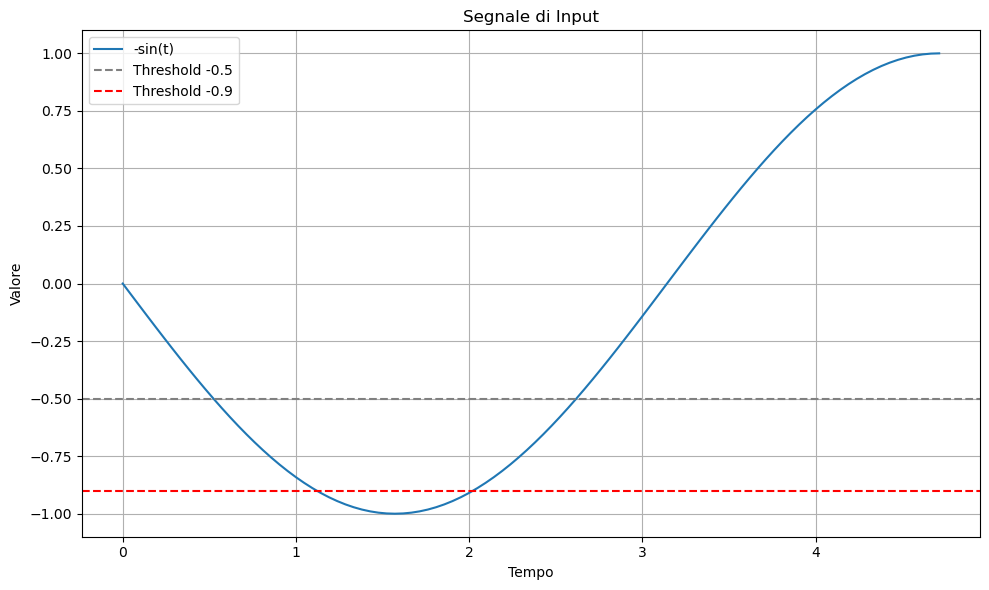

Forma reach_quant: torch.Size([1, 1, 100, 5])
Forma escape_quant: torch.Size([1, 1, 100, 5])


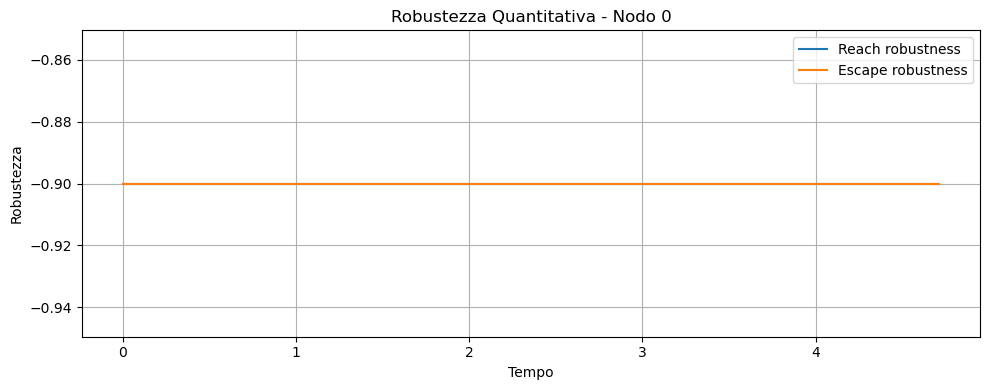

Forma reach_bool: torch.Size([1, 1, 100, 5])
Forma escape_bool: torch.Size([1, 1, 100, 5])


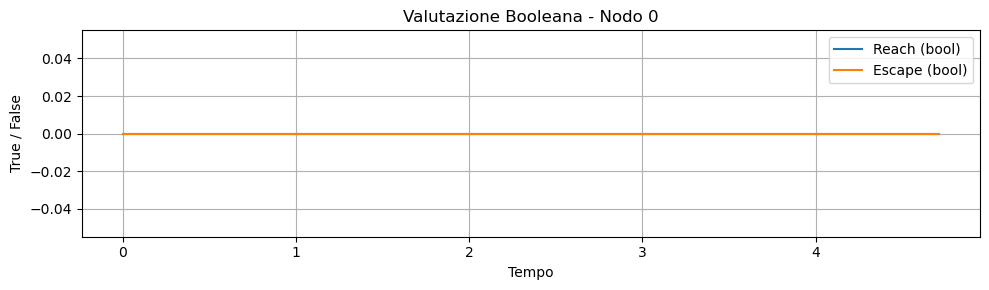

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# === SEGNALE ===
t = torch.linspace(0, 3 * np.pi / 2, steps=100)
signal = -torch.sin(t).unsqueeze(0).unsqueeze(0)  # shape: (1, 1, 100)

# === COSTRUISCI INPUT ===
N = 5  # numero di nodi
x = signal.repeat(1, N, 1)  # shape: (1, N, 100)

# === DISTANZE TRA I NODI ===
D = torch.tensor([[0, 1, 2, 3, 4],
                  [1, 0, 1, 2, 3],
                  [2, 1, 0, 1, 2],
                  [3, 2, 1, 0, 1],
                  [4, 3, 2, 1, 0]], dtype=torch.float32)

# === DEFINIZIONE STL ===
from torcheck.stl import Atom, Reach, Escape

phi1 = Atom(var_index=0, threshold=-0.5, lte=True)  # x <= -0.5
phi2 = Atom(var_index=0, threshold=-0.9, lte=True)  # x <= -0.9

reach_formula = Reach(phi1, phi2, D, d_min=1.0, d_max=2.0)
escape_formula = Escape(phi2, D, d_min=1.0, d_max=2.0)

# === VALUTAZIONE ===
reach_bool = reach_formula.boolean(x, evaluate_at_all_times=True)
reach_quant = reach_formula.quantitative(x, evaluate_at_all_times=True)

escape_bool = escape_formula.boolean(x, evaluate_at_all_times=True)
escape_quant = escape_formula.quantitative(x, evaluate_at_all_times=True)

# === PLOT SEGNALE ===
plt.figure(figsize=(10, 6))
plt.plot(t.numpy(), signal.squeeze().numpy(), label='-sin(t)')
plt.axhline(-0.5, color='gray', linestyle='--', label='Threshold -0.5')
plt.axhline(-0.9, color='red', linestyle='--', label='Threshold -0.9')
plt.title('Segnale di Input')
plt.xlabel('Tempo')
plt.ylabel('Valore')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === PLOT ROBUSTEZZA QUANTITATIVA ===
print("Forma reach_quant:", reach_quant.shape)
print("Forma escape_quant:", escape_quant.shape)

# Gestione dinamica della dimensione temporale
if reach_quant.shape[-1] == t.shape[0]:
    y_reach = reach_quant[0, 0, 0, :].detach().numpy()
    y_escape = escape_quant[0, 0, 0, :].detach().numpy()
elif reach_quant.shape[-1] == N:
    y_reach = np.full(t.shape[0], reach_quant[0, 0, 0].detach().numpy().mean())
    y_escape = np.full(t.shape[0], escape_quant[0, 0, 0].detach().numpy().mean())
else:
    raise ValueError("Forma inattesa per la robustezza: non compatibile con t")

plt.figure(figsize=(10, 4))
plt.plot(t.numpy(), y_reach, label='Reach robustness')
plt.plot(t.numpy(), y_escape, label='Escape robustness')
plt.title('Robustezza Quantitativa - Nodo 0')
plt.xlabel('Tempo')
plt.ylabel('Robustezza')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === PLOT BOOLEANO ===
print("Forma reach_bool:", reach_bool.shape)
print("Forma escape_bool:", escape_bool.shape)

if reach_bool.shape[-1] == t.shape[0]:
    yb_reach = reach_bool[0, 0, 0, :].int().numpy()
    yb_escape = escape_bool[0, 0, 0, :].int().numpy()
elif reach_bool.shape[-1] == N:
    yb_reach = np.full(t.shape[0], reach_bool[0, 0, 0, 0].int().item())
    yb_escape = np.full(t.shape[0], escape_bool[0, 0, 0, 0].int().item())
else:
    raise ValueError("Forma inattesa per la semantica booleana: non compatibile con t")

plt.figure(figsize=(10, 3))
plt.plot(t.numpy(), yb_reach, drawstyle='steps-post', label='Reach (bool)')
plt.plot(t.numpy(), yb_escape, drawstyle='steps-post', label='Escape (bool)')
plt.title('Valutazione Booleana - Nodo 0')
plt.xlabel('Tempo')
plt.ylabel('True / False')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Ensure shape is [T, N]
reach_result = reach_result.squeeze()
escape_result = escape_result.squeeze()

# If result is just (N,) because T = 1, reshape manually
if reach_result.ndim == 1:
    reach_result = reach_result[None, :]  # [1, N]
if escape_result.ndim == 1:
    escape_result = escape_result[None, :]  # [1, N]

# Transpose to [N, T] for imshow
reach_result = reach_result.T
escape_result = escape_result.T

# Plot
fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

for node in range(N):
    ax[0].plot(t.numpy(), signal[0, node], label=f"Node {node}")
ax[0].set_title("Signal: -sin(t)")
ax[0].legend()

im1 = ax[1].imshow(reach_result, aspect='auto', extent=[0, T, 0, N], origin='lower')
ax[1].set_title("Reach: φ R[1,2] φ")
fig.colorbar(im1, ax=ax[1])

im2 = ax[2].imshow(escape_result, aspect='auto', extent=[0, T, 0, N], origin='lower')
ax[2].set_title("Escape: E[1,2](φ)")
fig.colorbar(im2, ax=ax[2])

plt.xlabel("Time")
plt.tight_layout()
plt.show()


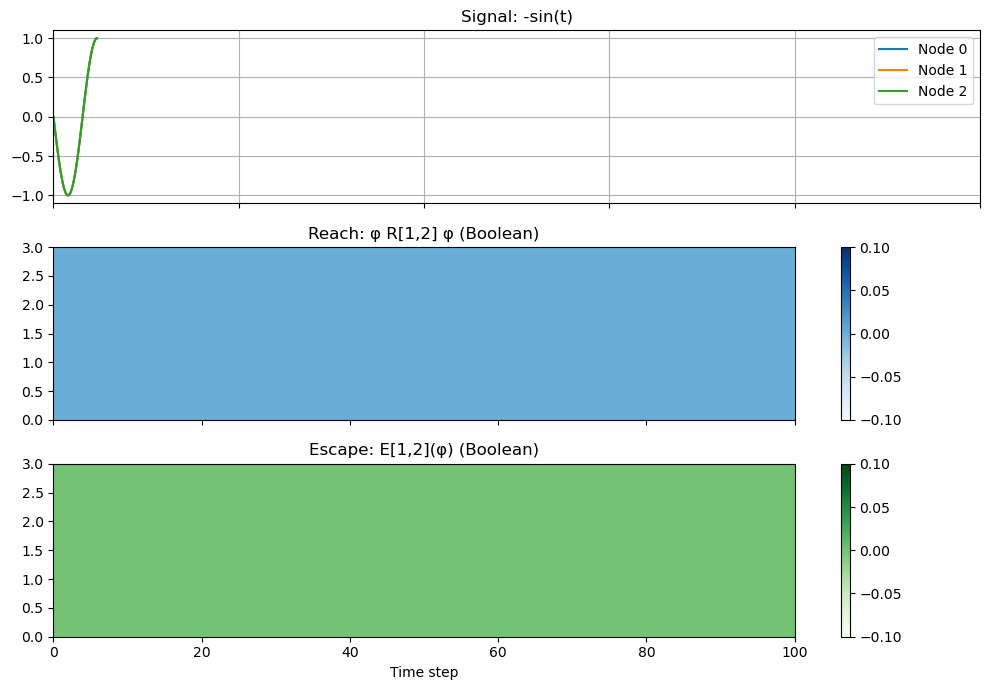

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Import STL modules from your implementation
from torcheck.stl import Atom, Reach, Escape

# Step 1: Generate a signal: -sin(t) over [0, 3π/2]
T = 100  # Number of time points
N = 3    # Number of nodes
t = torch.linspace(0, 1.5 * pi, T)
signal = -torch.sin(t).unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, T]

# Repeat the same signal for each node
signal = signal.repeat(1, N, 1)  # Shape: [1, N, T]

# Step 2: Define a simple symmetric distance matrix
distance_matrix = torch.tensor([
    [0.0, 1.0, 2.0],
    [1.0, 0.0, 1.0],
    [2.0, 1.0, 0.0]
])

# Step 3: Create STL formulas
phi = Atom(var_index=0, threshold=-0.5, lte=True)  # φ: signal <= -0.5

reach = Reach(
    phi1=phi,
    phi2=phi,
    distance_matrix=distance_matrix,
    d_min=1.0,
    d_max=2.0
)

escape = Escape(
    phi=phi,
    distance_matrix=distance_matrix,
    d_min=1.0,
    d_max=2.0
)

# Step 4: Evaluate Boolean semantics
reach_result = reach.boolean(signal).squeeze()  # Shape: [B, 1, T, N] → [T, N]
escape_result = escape.boolean(signal).squeeze()

# Fix possible shape collapse
if reach_result.ndim == 1:
    reach_result = reach_result[None, :]
if escape_result.ndim == 1:
    escape_result = escape_result[None, :]

# Transpose for plotting: [N, T]
reach_result = reach_result.T
escape_result = escape_result.T

# Step 5: Plot results
fig, ax = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

# Plot signal
for node in range(N):
    ax[0].plot(t.numpy(), signal[0, node].numpy(), label=f"Node {node}")
ax[0].set_title("Signal: -sin(t)")
ax[0].legend()
ax[0].grid(True)

# Plot Reach satisfaction over time
im1 = ax[1].imshow(reach_result, aspect='auto', extent=[0, T, 0, N], origin='lower', cmap='Blues')
ax[1].set_title("Reach: φ R[1,2] φ (Boolean)")
fig.colorbar(im1, ax=ax[1])

# Plot Escape satisfaction over time
im2 = ax[2].imshow(escape_result, aspect='auto', extent=[0, T, 0, N], origin='lower', cmap='Greens')
ax[2].set_title("Escape: E[1,2](φ) (Boolean)")
fig.colorbar(im2, ax=ax[2])

ax[2].set_xlabel("Time step")
plt.tight_layout()
plt.show()

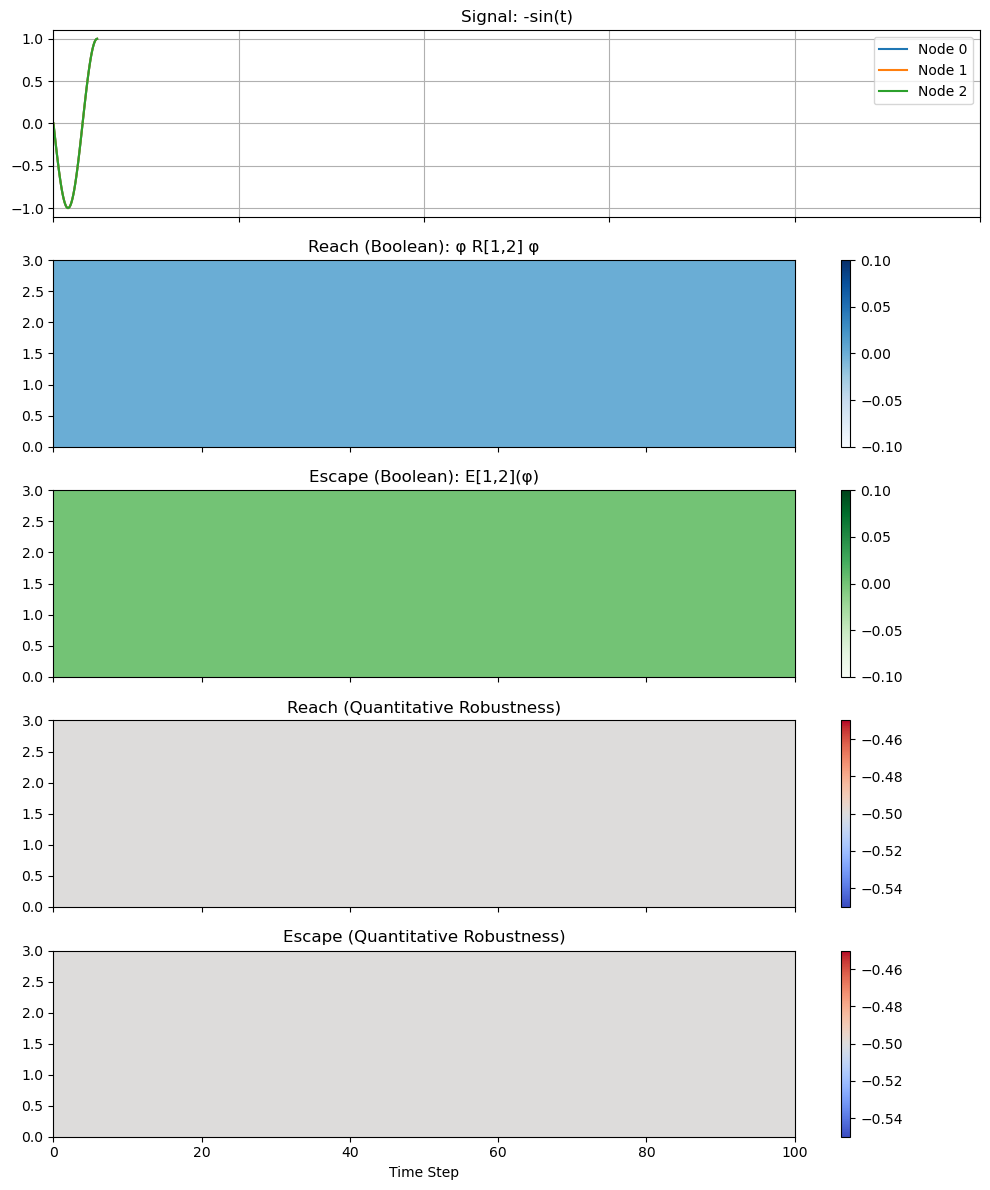

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Import your STL module
from torcheck.stl import Atom, Reach, Escape

# ==== Step 1: Create the signal ====

T = 100           # Number of time steps
N = 3             # Number of spatial nodes
t = torch.linspace(0, 1.5 * pi, T)
signal = -torch.sin(t).unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, T]
signal = signal.repeat(1, N, 1)  # Shape: [1, N, T]

# ==== Step 2: Define the spatial distance matrix ====

distance_matrix = torch.tensor([
    [0.0, 1.0, 2.0],
    [1.0, 0.0, 1.0],
    [2.0, 1.0, 0.0]
])

# ==== Step 3: Define the formula φ ====

phi = Atom(var_index=0, threshold=-0.5, lte=True)  # φ: x ≤ -0.5

reach = Reach(phi1=phi, phi2=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)
escape = Escape(phi=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)

# ==== Step 4: Evaluate Boolean and Quantitative ====

# Boolean results: [B, 1, T, N] → [T, N]
reach_bool = reach.boolean(signal).squeeze()
escape_bool = escape.boolean(signal).squeeze()

# Quantitative results: [B, 1, T, N] → [T, N]
reach_quant = reach.quantitative(signal).squeeze()
escape_quant = escape.quantitative(signal).squeeze()

# Handle shape collapse for plotting
def safe_format(x):
    if x.ndim == 1:
        x = x[None, :]
    return x.T  # Convert to [N, T] for imshow

reach_bool = safe_format(reach_bool)
escape_bool = safe_format(escape_bool)
reach_quant = safe_format(reach_quant)
escape_quant = safe_format(escape_quant)

# ==== Step 5: Plot ====

fig, axs = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Signal per node
for node in range(N):
    axs[0].plot(t.numpy(), signal[0, node].numpy(), label=f"Node {node}")
axs[0].set_title("Signal: -sin(t)")
axs[0].legend()
axs[0].grid(True)

# Boolean Reach
im1 = axs[1].imshow(reach_bool, aspect='auto', extent=[0, T, 0, N], origin='lower', cmap='Blues')
axs[1].set_title("Reach (Boolean): φ R[1,2] φ")
fig.colorbar(im1, ax=axs[1])

# Boolean Escape
im2 = axs[2].imshow(escape_bool, aspect='auto', extent=[0, T, 0, N], origin='lower', cmap='Greens')
axs[2].set_title("Escape (Boolean): E[1,2](φ)")
fig.colorbar(im2, ax=axs[2])

# Quantitative Reach
im3 = axs[3].imshow(reach_quant, aspect='auto', extent=[0, T, 0, N], origin='lower', cmap='coolwarm')
axs[3].set_title("Reach (Quantitative Robustness)")
fig.colorbar(im3, ax=axs[3])

# Quantitative Escape
im4 = axs[4].imshow(escape_quant, aspect='auto', extent=[0, T, 0, N], origin='lower', cmap='coolwarm')
axs[4].set_title("Escape (Quantitative Robustness)")
fig.colorbar(im4, ax=axs[4])

axs[4].set_xlabel("Time Step")
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

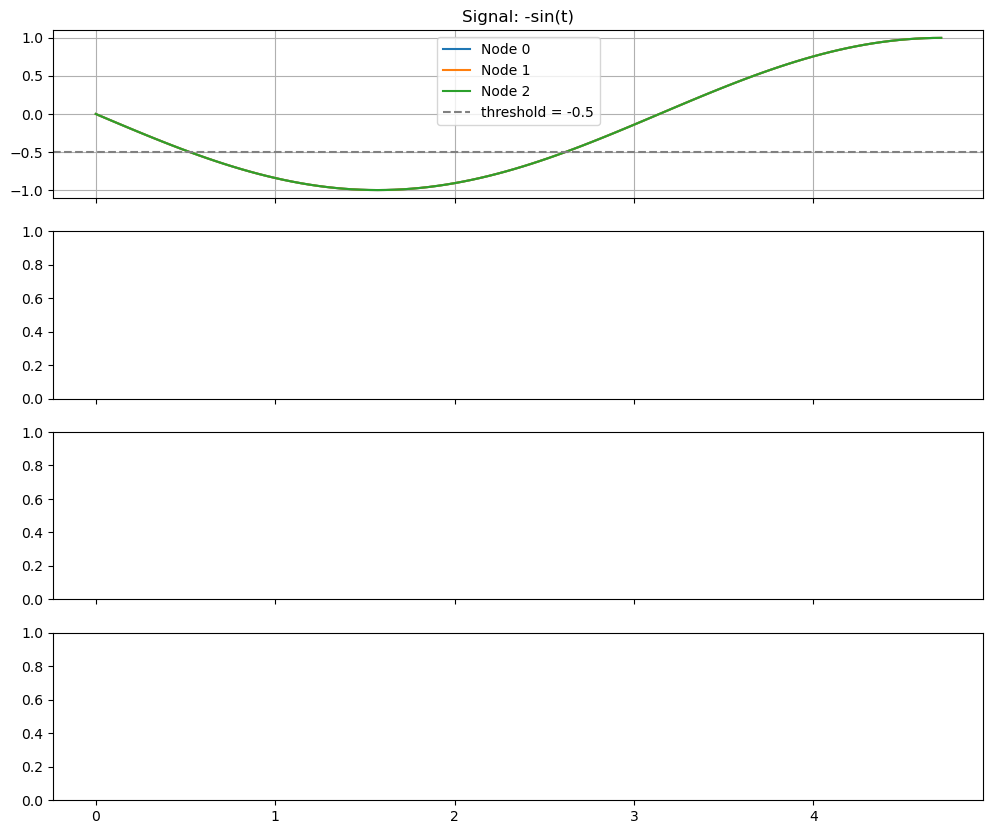

In [12]:
import matplotlib.pyplot as plt

# Plot signal and Reach/Escape results as lines
time = t.numpy()
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Signal per node ---
for node in range(N):
    axs[0].plot(time, signal[0, node].numpy(), label=f"Node {node}")
axs[0].axhline(-0.5, color='gray', linestyle='--', label='threshold = -0.5')
axs[0].set_title("Signal: -sin(t)")
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Reach Boolean ---
for node in range(N):
    axs[1].plot(time, reach_bool[node], label=f"Node {node}")
axs[1].set_title("Reach (Boolean): φ R[1,2] φ")
axs[1].set_ylim([-0.1, 1.1])
axs[1].grid(True)

# --- Plot 3: Escape Boolean ---
for node in range(N):
    axs[2].plot(time, escape_bool[node], label=f"Node {node}")
axs[2].set_title("Escape (Boolean): E[1,2](φ)")
axs[2].set_ylim([-0.1, 1.1])
axs[2].grid(True)

# --- Plot 4: Quantitative Robustness for Reach and Escape ---
axs[3].set_title("Robustness of Reach (solid) and Escape (dashed)")
for node in range(N):
    axs[3].plot(time, reach_quant[node], label=f"Reach - Node {node}")
    axs[3].plot(time, escape_quant[node], linestyle='--', label=f"Escape - Node {node}")
axs[3].axhline(0.0, color='gray', linestyle='--')
axs[3].grid(True)

axs[3].legend(loc='upper right')
axs[3].set_xlabel("Time")
plt.tight_layout()
plt.show()

Shapes after formatting:
reach_bool: torch.Size([1, 3])
escape_bool: torch.Size([1, 3])
reach_quant: torch.Size([1, 3])
escape_quant: torch.Size([1, 3])


ValueError: x and y must have same first dimension, but have shapes (100,) and (3,)

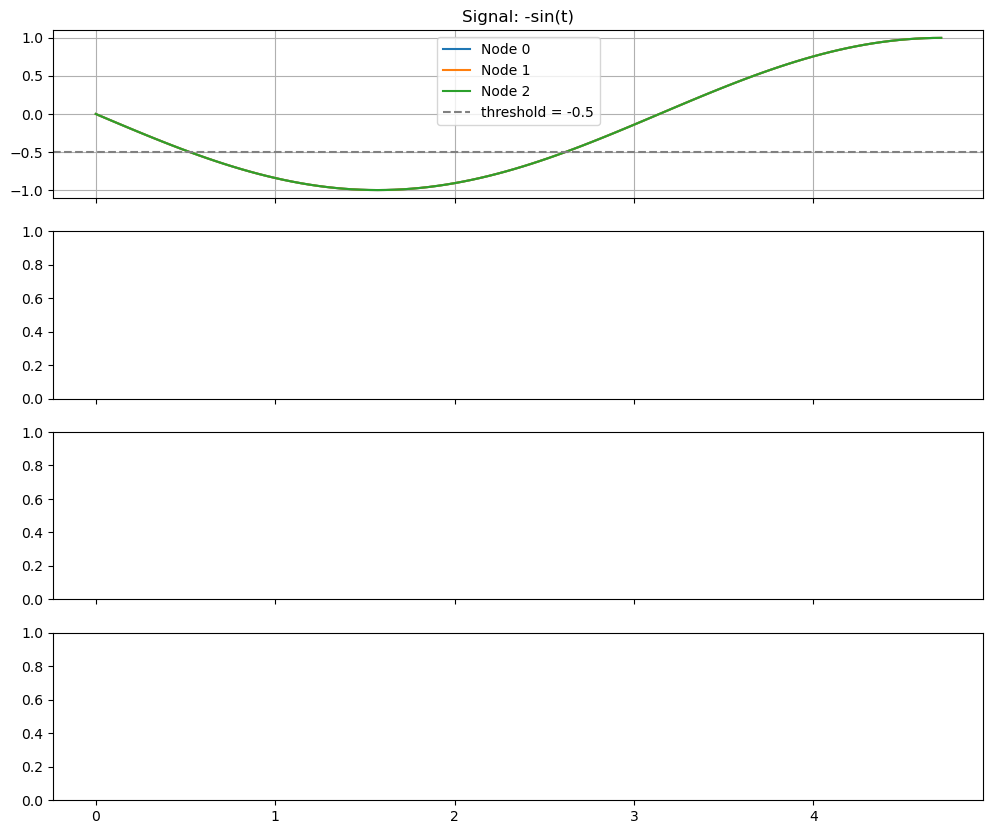

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# STL modules
from torcheck.stl import Atom, Reach, Escape

# ==== Step 1: Create spatio-temporal signal ====

T = 100  # Number of time steps
N = 3    # Number of spatial nodes
t = torch.linspace(0, 1.5 * pi, T)
signal = -torch.sin(t).unsqueeze(0).unsqueeze(0)  # [1, 1, T]
signal = signal.repeat(1, N, 1)  # [1, N, T]

# ==== Step 2: Distance matrix ====

distance_matrix = torch.tensor([
    [0.0, 1.0, 2.0],
    [1.0, 0.0, 1.0],
    [2.0, 1.0, 0.0]
])

# ==== Step 3: Define formula φ ====

phi = Atom(var_index=0, threshold=-0.5, lte=True)  # φ: x ≤ -0.5

reach = Reach(phi1=phi, phi2=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)
escape = Escape(phi=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)

# ==== Step 4: Evaluate ====

reach_bool = reach.boolean(signal).squeeze()
escape_bool = escape.boolean(signal).squeeze()
reach_quant = reach.quantitative(signal).squeeze()
escape_quant = escape.quantitative(signal).squeeze()

# ==== Step 5: Ensure format is [N, T] ====

def ensure_N_T_format(x, N):
    x = x.squeeze()
    if x.ndim == 0:
        x = x.view(1, -1)         # scalar → [1, 1]
    elif x.ndim == 1:
        x = x.unsqueeze(0)        # [T] → [1, T]
    elif x.shape[0] != N and x.shape[1] == N:
        x = x.T                   # [T, N] → [N, T]
    return x

reach_bool = ensure_N_T_format(reach_bool, N)
escape_bool = ensure_N_T_format(escape_bool, N)
reach_quant = ensure_N_T_format(reach_quant, N)
escape_quant = ensure_N_T_format(escape_quant, N)

# Optional debug
print("Shapes after formatting:")
print("reach_bool:", reach_bool.shape)
print("escape_bool:", escape_bool.shape)
print("reach_quant:", reach_quant.shape)
print("escape_quant:", escape_quant.shape)

# ==== Step 6: Plot ====

time = t.numpy()
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Input signal per node ---
for node in range(N):
    axs[0].plot(time, signal[0, node].numpy(), label=f"Node {node}")
axs[0].axhline(-0.5, color='gray', linestyle='--', label='threshold = -0.5')
axs[0].set_title("Signal: -sin(t)")
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Reach Boolean per node ---
for node in range(N):
    axs[1].plot(time, reach_bool[node].numpy(), label=f"Node {node}")
axs[1].set_title("Reach (Boolean): φ R[1,2] φ")
axs[1].set_ylim([-0.1, 1.1])
axs[1].grid(True)

# --- Plot 3: Escape Boolean per node ---
for node in range(N):
    axs[2].plot(time, escape_bool[node].numpy(), label=f"Node {node}")
axs[2].set_title("Escape (Boolean): E[1,2](φ)")
axs[2].set_ylim([-0.1, 1.1])
axs[2].grid(True)

# --- Plot 4: Quantitative Robustness ---
axs[3].set_title("Robustness: Reach (solid) and Escape (dashed)")
for node in range(N):
    axs[3].plot(time, reach_quant[node].numpy(), label=f"Reach - Node {node}")
    axs[3].plot(time, escape_quant[node].numpy(), linestyle='--', label=f"Escape - Node {node}")
axs[3].axhline(0.0, color='gray', linestyle='--')
axs[3].legend(loc='upper right')
axs[3].grid(True)

axs[3].set_xlabel("Time")
plt.tight_layout()
plt.show()

Shapes after formatting:
reach_bool: torch.Size([1, 3])
escape_bool: torch.Size([1, 3])
reach_quant: torch.Size([1, 3])
escape_quant: torch.Size([1, 3])


ValueError: x and y must have same first dimension, but have shapes (100,) and (3,)

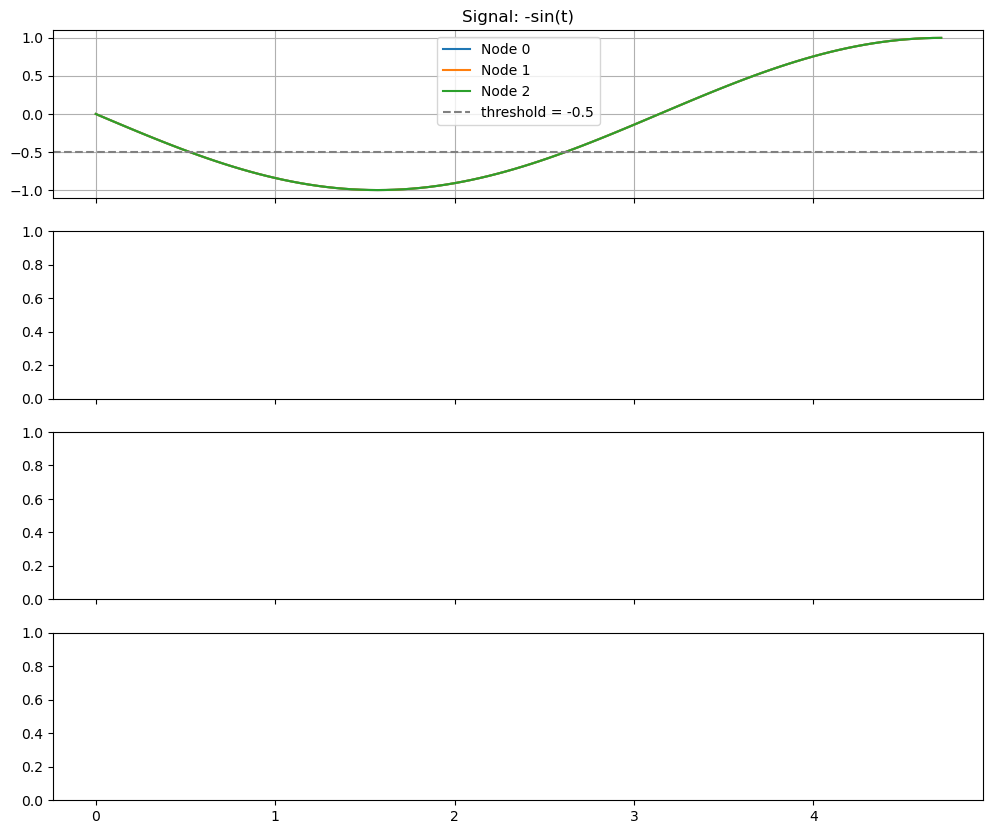

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# STL logic module
from torcheck.stl import Atom, Reach, Escape

# ==== Step 1: Create spatio-temporal signal ====

T = 100  # time steps
N = 3    # number of spatial nodes
t = torch.linspace(0, 1.5 * pi, T)
signal = -torch.sin(t).unsqueeze(0).unsqueeze(0)  # shape: [1, 1, T]
signal = signal.repeat(1, N, 1)  # shape: [1, N, T]

# ==== Step 2: Distance matrix ====

distance_matrix = torch.tensor([
    [0.0, 1.0, 2.0],
    [1.0, 0.0, 1.0],
    [2.0, 1.0, 0.0]
])

# ==== Step 3: Define STL formula φ ====

phi = Atom(var_index=0, threshold=-0.5, lte=True)  # φ: x ≤ -0.5

reach = Reach(phi1=phi, phi2=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)
escape = Escape(phi=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)

# ==== Step 4: Evaluate semantics ====

reach_bool = reach.boolean(signal).squeeze()
escape_bool = escape.boolean(signal).squeeze()
reach_quant = reach.quantitative(signal).squeeze()
escape_quant = escape.quantitative(signal).squeeze()

# ==== Step 5: Format tensors as [N, T] ====

def ensure_N_T_format(x, N):
    x = x.squeeze()
    if x.ndim == 0:
        x = x.view(1, -1)
    elif x.ndim == 1:
        x = x.unsqueeze(0)
    elif x.shape[0] != N and x.shape[1] == N:
        x = x.T
    return x

reach_bool = ensure_N_T_format(reach_bool, N)
escape_bool = ensure_N_T_format(escape_bool, N)
reach_quant = ensure_N_T_format(reach_quant, N)
escape_quant = ensure_N_T_format(escape_quant, N)

# Optional: Print debug shapes
print("Shapes after formatting:")
print("reach_bool:", reach_bool.shape)
print("escape_bool:", escape_bool.shape)
print("reach_quant:", reach_quant.shape)
print("escape_quant:", escape_quant.shape)

# ==== Step 6: Plot results ====

time = t.numpy()
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Input signal per node ---
for node in range(N):
    axs[0].plot(time, signal[0, node].numpy(), label=f"Node {node}")
axs[0].axhline(-0.5, color='gray', linestyle='--', label='threshold = -0.5')
axs[0].set_title("Signal: -sin(t)")
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Reach Boolean per node ---
for node in range(N):
    axs[1].plot(time, reach_bool.numpy()[node], label=f"Node {node}")
axs[1].set_title("Reach (Boolean): φ R[1,2] φ")
axs[1].set_ylim([-0.1, 1.1])
axs[1].grid(True)

# --- Plot 3: Escape Boolean per node ---
for node in range(N):
    axs[2].plot(time, escape_bool.numpy()[node], label=f"Node {node}")
axs[2].set_title("Escape (Boolean): E[1,2](φ)")
axs[2].set_ylim([-0.1, 1.1])
axs[2].grid(True)

# --- Plot 4: Robustness (Quantitative) ---
axs[3].set_title("Robustness: Reach (solid) and Escape (dashed)")
for node in range(N):
    axs[3].plot(time, reach_quant.numpy()[node], label=f"Reach - Node {node}")
    axs[3].plot(time, escape_quant.numpy()[node], linestyle='--', label=f"Escape - Node {node}")
axs[3].axhline(0.0, color='gray', linestyle='--')
axs[3].legend(loc='upper right')
axs[3].grid(True)

axs[3].set_xlabel("Time")
plt.tight_layout()
plt.show()


Shapes after formatting:
reach_bool: torch.Size([3, 1])
escape_bool: torch.Size([3, 1])
reach_quant: torch.Size([3, 1])
escape_quant: torch.Size([3, 1])


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

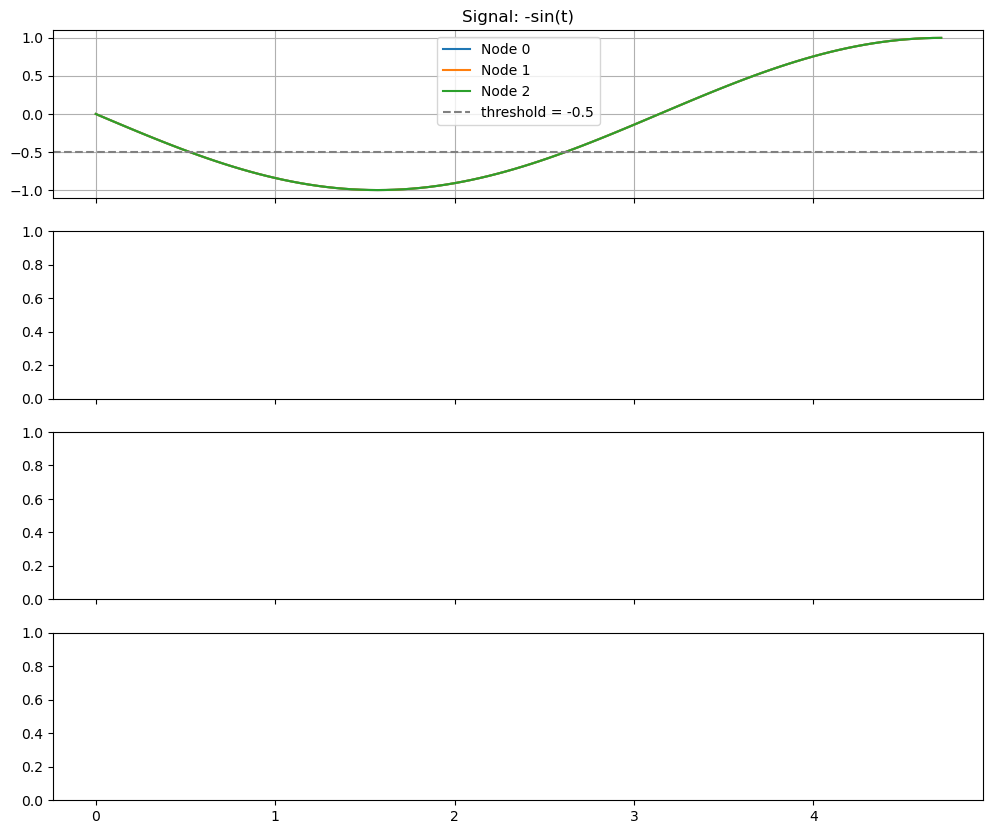

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Import your STL logic module
from torcheck.stl import Atom, Reach, Escape

# ==== Step 1: Create spatio-temporal signal ====

T = 100  # number of time steps
N = 3    # number of spatial nodes
t = torch.linspace(0, 1.5 * pi, T)
signal = -torch.sin(t).unsqueeze(0).unsqueeze(0)  # shape: [1, 1, T]
signal = signal.repeat(1, N, 1)  # shape: [1, N, T]

# ==== Step 2: Distance matrix ====

distance_matrix = torch.tensor([
    [0.0, 1.0, 2.0],
    [1.0, 0.0, 1.0],
    [2.0, 1.0, 0.0]
])

# ==== Step 3: Define STL formula φ ====

phi = Atom(var_index=0, threshold=-0.5, lte=True)  # φ: x ≤ -0.5

reach = Reach(phi1=phi, phi2=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)
escape = Escape(phi=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)

# ==== Step 4: Evaluate semantics ====

reach_bool = reach.boolean(signal).squeeze()
escape_bool = escape.boolean(signal).squeeze()
reach_quant = reach.quantitative(signal).squeeze()
escape_quant = escape.quantitative(signal).squeeze()

# ==== Step 5: Format tensors as [N, T] ====

def ensure_N_T_format(x, N, T):
    x = x.squeeze()
    if x.ndim == 0:
        x = x.view(1, -1)
    elif x.ndim == 1:
        x = x.unsqueeze(0)
    if x.shape != (N, T):
        if x.shape == (T, N):
            x = x.T
        elif x.shape[0] == N:
            pass
        elif x.shape[1] == N:
            x = x.T
        else:
            raise ValueError(f"Unexpected shape for tensor: {x.shape}")
    return x

reach_bool = ensure_N_T_format(reach_bool, N, T)
escape_bool = ensure_N_T_format(escape_bool, N, T)
reach_quant = ensure_N_T_format(reach_quant, N, T)
escape_quant = ensure_N_T_format(escape_quant, N, T)

# Optional: Print debug shapes
print("Shapes after formatting:")
print("reach_bool:", reach_bool.shape)
print("escape_bool:", escape_bool.shape)
print("reach_quant:", reach_quant.shape)
print("escape_quant:", escape_quant.shape)

# ==== Step 6: Plot results ====

time = t.numpy()
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Input signal per node ---
for node in range(N):
    axs[0].plot(time, signal[0, node].numpy(), label=f"Node {node}")
axs[0].axhline(-0.5, color='gray', linestyle='--', label='threshold = -0.5')
axs[0].set_title("Signal: -sin(t)")
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Reach Boolean per node ---
for node in range(N):
    axs[1].plot(time, reach_bool.numpy()[node], label=f"Node {node}")
axs[1].set_title("Reach (Boolean): φ R[1,2] φ")
axs[1].set_ylim([-0.1, 1.1])
axs[1].grid(True)

# --- Plot 3: Escape Boolean per node ---
for node in range(N):
    axs[2].plot(time, escape_bool.numpy()[node], label=f"Node {node}")
axs[2].set_title("Escape (Boolean): E[1,2](φ)")
axs[2].set_ylim([-0.1, 1.1])
axs[2].grid(True)

# --- Plot 4: Robustness (Quantitative) ---
axs[3].set_title("Robustness: Reach (solid) and Escape (dashed)")
for node in range(N):
    axs[3].plot(time, reach_quant.numpy()[node], label=f"Reach - Node {node}")
    axs[3].plot(time, escape_quant.numpy()[node], linestyle='--', label=f"Escape - Node {node}")
axs[3].axhline(0.0, color='gray', linestyle='--')
axs[3].legend(loc='upper right')
axs[3].grid(True)

axs[3].set_xlabel("Time")
plt.tight_layout()
plt.show()

Shapes after formatting:
reach_bool: torch.Size([3, 100])
escape_bool: torch.Size([3, 100])
reach_quant: torch.Size([3, 100])
escape_quant: torch.Size([3, 100])


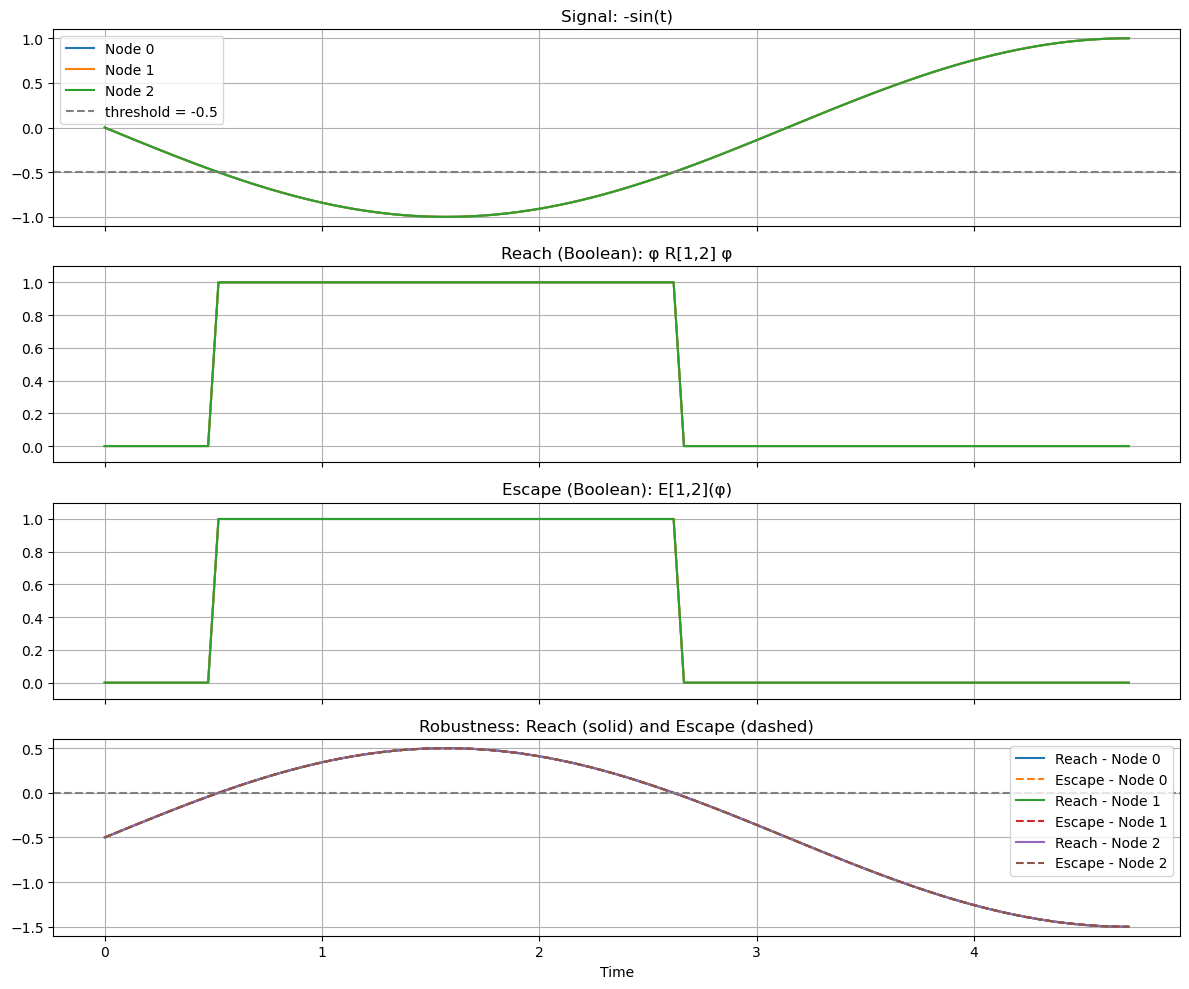

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# STL logic module
from torcheck.stl import Atom, Reach, Escape

# ==== Step 1: Create spatio-temporal signal ====

T = 100  # number of time steps
N = 3    # number of spatial nodes
t = torch.linspace(0, 1.5 * pi, T)
signal = -torch.sin(t).unsqueeze(0).unsqueeze(0)  # shape: [1, 1, T]
signal = signal.repeat(1, N, 1)  # shape: [1, N, T]

# ==== Step 2: Distance matrix ====

distance_matrix = torch.tensor([
    [0.0, 1.0, 2.0],
    [1.0, 0.0, 1.0],
    [2.0, 1.0, 0.0]
])

# ==== Step 3: Define STL formula φ ====

phi = Atom(var_index=0, threshold=-0.5, lte=True)  # φ: x ≤ -0.5 checks if the signal at a node is below -0.5 (a specific phase of -sin(t))

reach = Reach(phi1=phi, phi2=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)
escape = Escape(phi=phi, distance_matrix=distance_matrix, d_min=1.0, d_max=2.0)

# ==== Step 4: Evaluate semantics (now with full time series) ====

reach_bool = reach.boolean(signal, evaluate_at_all_times=True).squeeze()
escape_bool = escape.boolean(signal, evaluate_at_all_times=True).squeeze()
reach_quant = reach.quantitative(signal, evaluate_at_all_times=True).squeeze()
escape_quant = escape.quantitative(signal, evaluate_at_all_times=True).squeeze()

# ==== Step 5: Format tensors as [N, T] ====

def ensure_N_T_format(x, N, T):
    x = x.squeeze()
    if x.ndim == 0:
        x = x.view(1, -1)
    elif x.ndim == 1:
        x = x.unsqueeze(0)
    if x.shape != (N, T):
        if x.shape == (T, N):
            x = x.T
        elif x.shape[0] == N:
            pass
        elif x.shape[1] == N:
            x = x.T
        else:
            raise ValueError(f"Unexpected shape for tensor: {x.shape}")
    return x

reach_bool = ensure_N_T_format(reach_bool, N, T)
escape_bool = ensure_N_T_format(escape_bool, N, T)
reach_quant = ensure_N_T_format(reach_quant, N, T)
escape_quant = ensure_N_T_format(escape_quant, N, T)

# Optional: Print debug shapes
print("Shapes after formatting:")
print("reach_bool:", reach_bool.shape)
print("escape_bool:", escape_bool.shape)
print("reach_quant:", reach_quant.shape)
print("escape_quant:", escape_quant.shape)

# ==== Step 6: Plot results ====

time = t.numpy()
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# --- Plot 1: Input signal per node ---
for node in range(N):
    axs[0].plot(time, signal[0, node].numpy(), label=f"Node {node}")
axs[0].axhline(-0.5, color='gray', linestyle='--', label='threshold = -0.5')
axs[0].set_title("Signal: -sin(t)")
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Reach Boolean per node ---
for node in range(N):
    axs[1].plot(time, reach_bool.numpy()[node], label=f"Node {node}")
axs[1].set_title("Reach (Boolean): φ R[1,2] φ")
axs[1].set_ylim([-0.1, 1.1])
axs[1].grid(True)

# --- Plot 3: Escape Boolean per node ---
for node in range(N):
    axs[2].plot(time, escape_bool.numpy()[node], label=f"Node {node}")
axs[2].set_title("Escape (Boolean): E[1,2](φ)")
axs[2].set_ylim([-0.1, 1.1])
axs[2].grid(True)

# --- Plot 4: Robustness (Quantitative) ---
axs[3].set_title("Robustness: Reach (solid) and Escape (dashed)")
for node in range(N):
    axs[3].plot(time, reach_quant.numpy()[node], label=f"Reach - Node {node}")
    axs[3].plot(time, escape_quant.numpy()[node], linestyle='--', label=f"Escape - Node {node}")
axs[3].axhline(0.0, color='gray', linestyle='--')
axs[3].legend(loc='upper right')
axs[3].grid(True)

axs[3].set_xlabel("Time")
plt.tight_layout()
plt.show()

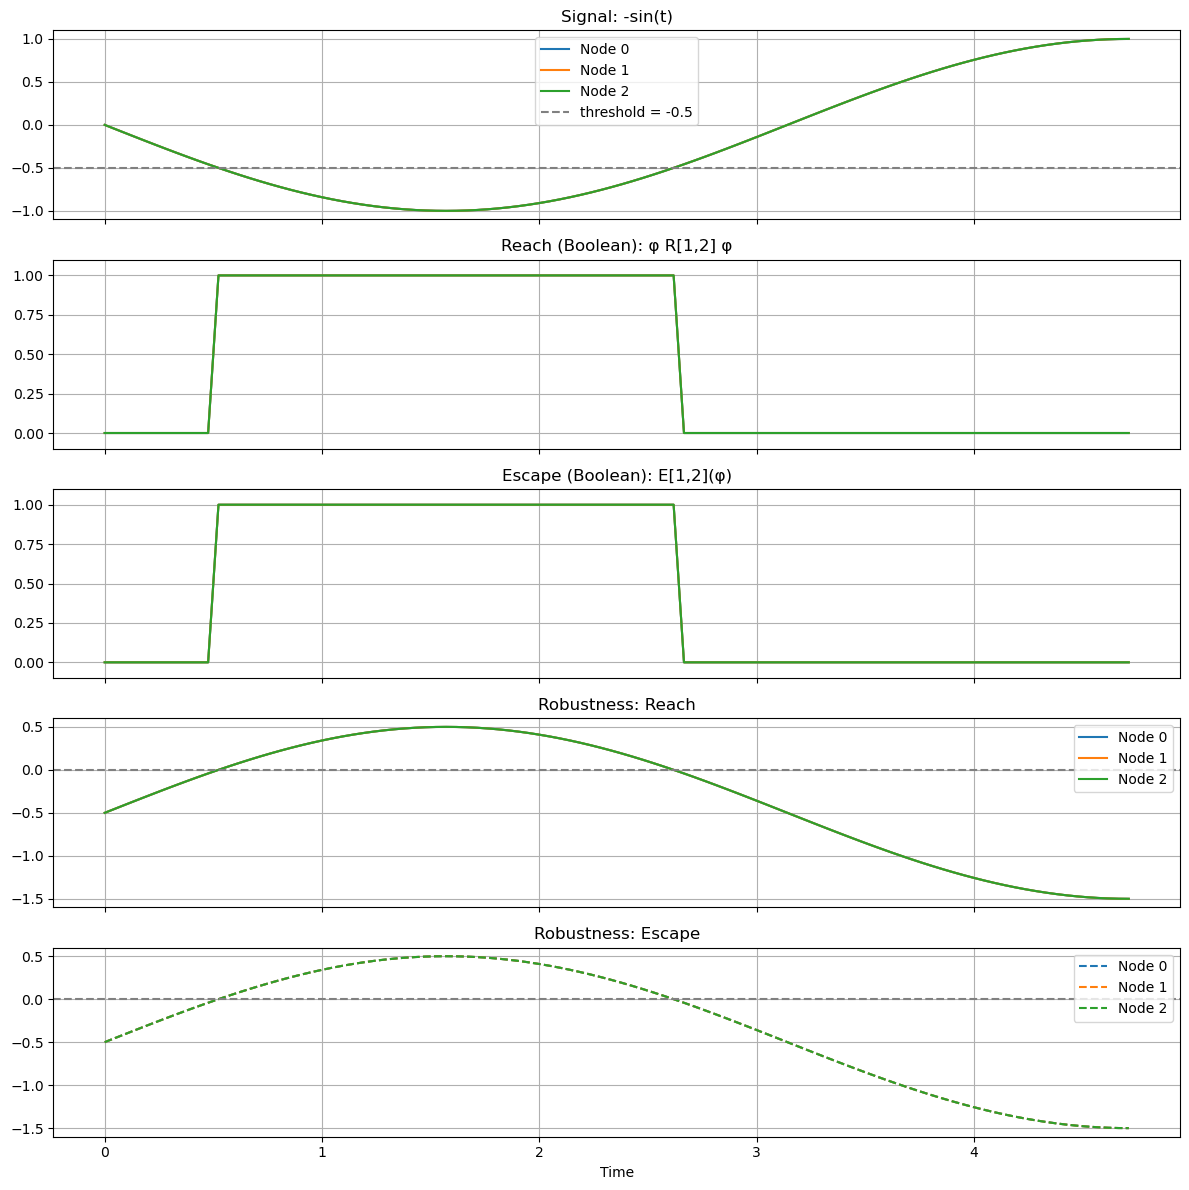

In [17]:
# ==== Step 6: Plot results ====

time = t.numpy()
fig, axs = plt.subplots(5, 1, figsize=(12, 12), sharex=True)

# --- Plot 1: Input signal per node ---
for node in range(N):
    axs[0].plot(time, signal[0, node].numpy(), label=f"Node {node}")
axs[0].axhline(-0.5, color='gray', linestyle='--', label='threshold = -0.5')
axs[0].set_title("Signal: -sin(t)")
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Reach Boolean per node ---
for node in range(N):
    axs[1].plot(time, reach_bool.numpy()[node], label=f"Node {node}")
axs[1].set_title("Reach (Boolean): φ R[1,2] φ")
axs[1].set_ylim([-0.1, 1.1])
axs[1].grid(True)

# --- Plot 3: Escape Boolean per node ---
for node in range(N):
    axs[2].plot(time, escape_bool.numpy()[node], label=f"Node {node}")
axs[2].set_title("Escape (Boolean): E[1,2](φ)")
axs[2].set_ylim([-0.1, 1.1])
axs[2].grid(True)

# --- Plot 4: Reach Robustness ---
axs[3].set_title("Robustness: Reach")
for node in range(N):
    axs[3].plot(time, reach_quant.numpy()[node], label=f"Node {node}")
axs[3].axhline(0.0, color='gray', linestyle='--')
axs[3].legend(loc='upper right')
axs[3].grid(True)

# --- Plot 5: Escape Robustness ---
axs[4].set_title("Robustness: Escape")
for node in range(N):
    axs[4].plot(time, escape_quant.numpy()[node], linestyle='--', label=f"Node {node}")
axs[4].axhline(0.0, color='gray', linestyle='--')
axs[4].legend(loc='upper right')
axs[4].grid(True)

axs[4].set_xlabel("Time")
plt.tight_layout()
plt.show()